# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


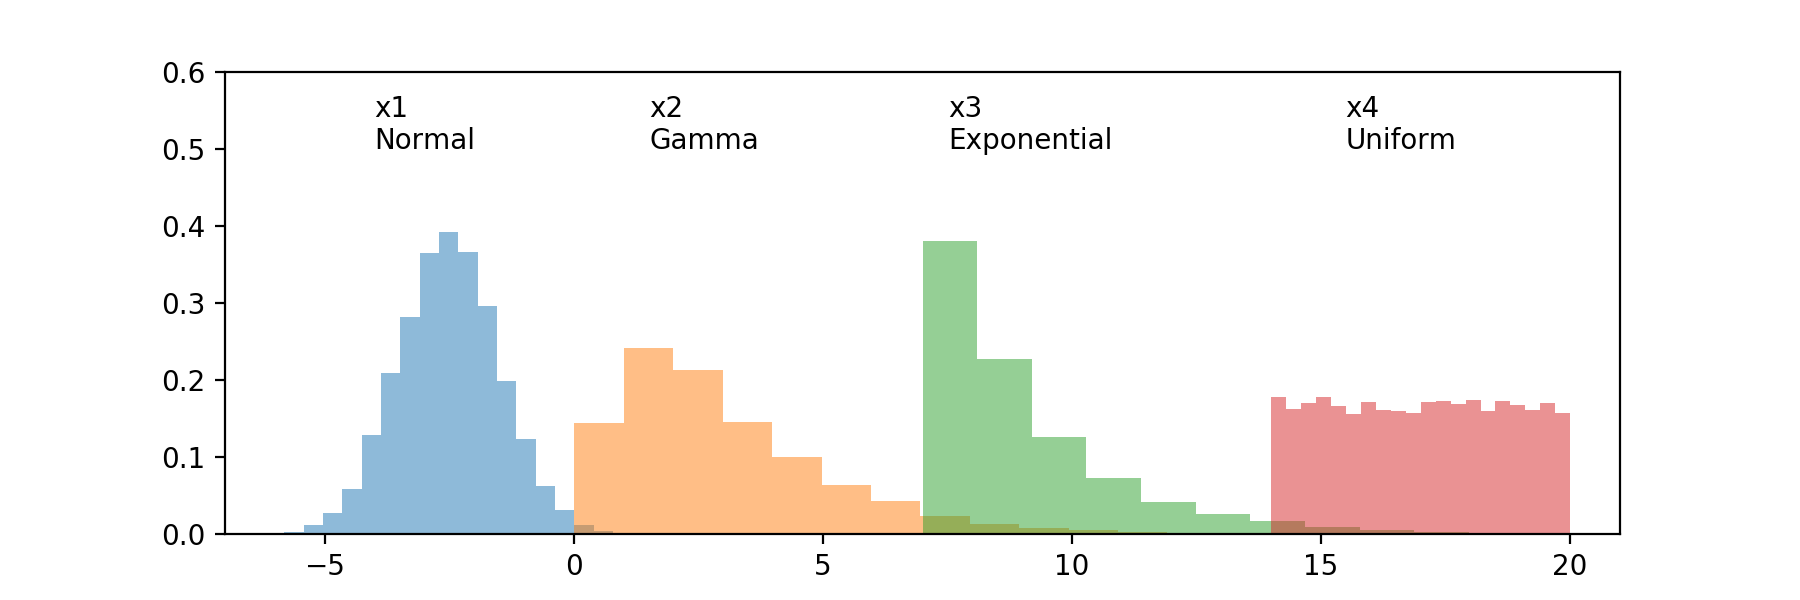

Text(15.488134592326922, 0.5, 'x4\nUniform')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

n = 1000
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(0, 10, n)

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins1 = np.arange(-7, 3, 0.5)
    bins2 = np.arange(0, 10, 0.5)
    bins3 = np.arange(7, 17, 0.5)
    bins4 = np.arange(13, 20, 0.5)
    bins = np.arange(-4, 4, 0.5)


    axs[0].hist(x1[:curr], density=True, stacked=True, bins=bins, alpha=1, color='lightblue')
    axs[1].hist(x2[:curr], density=True, stacked=True, bins=bins, alpha=1, color='navajowhite')
    axs[2].hist(x3[:curr], density=True, stacked=True, bins=bins, alpha=1, color='palegreen')
    axs[3].hist(x4[:curr], density=True, stacked=True, bins=bins, alpha=1, color='lightsalmon')
    
    #axs[0].set_xlim([-7, 3])
    axs[0].axis([-5, 2, 0, 3])
    axs[1].axis([0, 4, 0, 3])
    axs[2].axis([0, 4, 0, 3])
    axs[3].axis([0,4, 0, 1])
    
    axs[0].set_title('Normal n = {}'.format(curr))
    axs[1].set_title('Gamma n = {}'.format(curr))
    axs[2].set_title('Exponential n = {}'.format(curr))
    axs[3].set_title('Uniform n = {}'.format(curr))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axs = [ax1, ax2, ax3, ax4]
fig.tight_layout(pad=3.0)
a = animation.FuncAnimation(fig, update, interval=1)